In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
colors = ['salmon','dodgerblue','mediumseagreen']
colors = ['#FFA0A0','#1e90ff','#3cb371']
colors_light = ['#FFEDED','#6BDDFF','#89FFBE']

# N=8

In [26]:
# Exact S2 from ED
S2_SF_exact = 0.012284605416158443   # U/t=0.5
S2_PT_exact = 0.04786463276686823    # U/t=3.3
S2_MOTT_exact = 0.04604484764699668  # U/t=10.0

In [27]:
# U/t=10.0
betas = np.array([0.6, 0.7, 0.8, 0.9, 1.0, 1.15, 1.3, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0])
S2_MOTT = np.array([0.019634977838567498, 0.02573539478828623, 0.0318984723866677, 0.03605762420217672, 0.039612335779582966, 0.042922128956308626, 0.04475196561379139, 0.04542812304709463, 0.046152195584211776, 0.04604982979557657, 0.0456942665547006, 0.046152175770162174, 0.04589199939902582, 0.04656003163227767])
S2_MOTT_err = np.array([0.00017098395591251054, 0.0001634153204719166, 0.0002580014329667229, 0.00039608557654441536, 0.00016052130250228904, 0.00020962970825152575, 0.00016093510486396432, 0.00020221464527725338, 0.00020006717268469232, 0.00020048951210443122, 0.00021140795986117076, 0.00027591703553624775, 0.0003271906339090475, 0.00027939736123813155])

# Calculate relative error between exact and estimate S2
S2_MOTT_relErr = np.abs((S2_MOTT-S2_MOTT_exact)/S2_MOTT_exact)
S2_MOTT_relErr_err = np.abs(S2_MOTT_err / S2_MOTT_exact)

# U/t=0.5
S2_SF = np.array([0.00023590306773289195, -0.0005368570588189817, -0.0005961829550495601, -0.0003949665719199818, -0.0010377680938444698, -0.0009661718375910044, -0.0008408290789074545, -2.158494648536928e-06, 0.001250618403307835, 0.002167438708127329, 0.005171083013608871, 0.007495716934567132, 0.009097004826818592, 0.010106469287062717])
S2_SF_err = np.array([0.00012482395087322904, 0.00011765330651818501, 0.00020224117532998486, 0.0003294049537086368, 0.00012125076872941885, 0.00017618936738424132, 0.00013261502769529836, 0.00014743821611171208, 0.00015970778225233217, 0.0001621980686921876, 0.0001337963847401633, 0.00014509604966738408, 0.00016069635058058208, 0.00019499769394809146])

# Calculate relative error between exact and estimate S2
S2_SF_relErr = np.abs((S2_SF-S2_SF_exact)/S2_SF_exact)
S2_SF_relErr_err = np.abs(S2_SF_err / S2_SF_exact)

# U/t=3.3
S2_PT = np.array([0.004424156392910229, 0.007055902480479701, 0.010946867432215127, 0.014263789080734807, 0.017557083707481082, 0.022233610375625976, 0.026448783193629304, 0.031573355343046755, 0.03596173963811227, 0.0392836677416325, 0.04423902195051682, 0.04571571736058756, 0.046674592775072694, 0.04789191845986924])
S2_PT_err = np.array([0.00017871492471713287, 0.00016652316653168345, 0.00015912739664037648, 0.00016345051009567454, 0.0001960971411348087, 0.00017335922599662486, 0.00018302642651308953, 0.00018872371020988837, 0.0001996842147257736, 0.0002207700013874264, 0.0002509940902513648, 0.00027254341226113087, 0.00026979549396222906, 0.00028533125839561626])

# Calculate relative error between exact and estimate S2
S2_PT_relErr = np.abs((S2_PT-S2_PT_exact)/S2_PT_exact)
S2_PT_relErr_err = np.abs(S2_PT_err / S2_PT_exact)

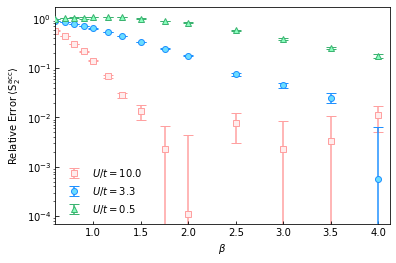

In [28]:
fig,ax1 = plt.subplots()
ax1.set_yscale("log")

# U/t=10.0
ax1.errorbar(betas,S2_MOTT_relErr, yerr=S2_MOTT_relErr_err, fmt='.', capsize=5,
            label=r'$U/t=10.0$',color=colors[0],mfc=colors_light[0],marker='s',zorder=1)
# U/t=3.3
ax1.errorbar(betas,S2_PT_relErr, yerr=S2_PT_relErr_err, fmt='.', capsize=5,
            label=r'$U/t=3.3$',color=colors[1],mfc=colors_light[1],marker='o',zorder=2)
# U/t=0.5
ax1.errorbar(betas,S2_SF_relErr, yerr=S2_SF_relErr_err, fmt='.', capsize=5,
            label=r'$U/t=0.5$',color=colors[2],mfc=colors_light[2],marker='^',zorder=3)

ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; \langle S_2^{\rm{acc}} \rangle$')
ax1.set_xlabel(r'$\beta$')
# ax1.annotate(r"$M=8,N=8,\ell=4$",(0.4,0.50+.30),xycoords='figure fraction')
# ax1.annotate(r"$U=10.000000$",(0.60,0.40+.30),xycoords='figure fraction')
ax1.axhline(0,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.tick_params(direction='in')

# Set plot limits
ax1.set_xlim(np.min(betas)*0.99,np.max(betas)*1.03)
# ax.set_ylim(np.min()*0.95,np.max(S2__beta1)*1.05);

# # Perform linear fit to ln(y) vs x:
# m,lnB = np.polyfit(betas[9:],np.log(S2_PT_relErr)[9:],deg=1)
# B = np.exp(lnB)

# betas_fit = np.linspace(betas[9],6.0,1000)
# ax1.plot(betas_fit,B*np.exp(m*betas_fit))
# ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

# Set legend
plt.legend(frameon=False)

# Save figure
plt.savefig("relativeErrorsS2acc_N8.pdf",dpi=400)
plt.savefig("relativeErrorsS2acc_N8.png",dpi=400)
plt.show()